# Searching for Supernova (and other Transient) Spectra in DESI

DESI is designed to study dark energy by carefully measuring the 3D positions of millions of galaxies. During the survey, by chance DESI will catch a fraction of the observed galaxies containing powerful astrophysical explosions such as supernovae, kilonovae, tidal disruption events, and other energetic events. If we train our software to specifically look for the signatures of these explosions, we can potentially discover and classify thousands of them each year.

First, we'll focus on supernova and how we tell them apart.

## Supernova Types: Core-Collapse

In most cases, supernova are the final stage of the life cycle of very massive stars (>10 times the mass of the Sun). When the core of a massive star burns through its available nuclear fuel, it stops producing enough energy to hold up the outer envelope of the star. The star then collapses under its own weight in a fraction of a second and explodes. This is called a **core collapse** supernova for obvious reasons.

## Example Spectra in the Bright Galaxy Survey

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits

mpl.rc('font', size=14)

### Spectrum Plots

Here is a file containing simulated spectra from the DESI Bright Galaxy Survey (BGS). The first spectrum shows what a normal galaxy looks like. The rest show galaxies "contaminated" with light from a luminous supernova. Several types of supernova are simulated. Take a close look at the features in the spectrum and see if you can identify the difference.

In [17]:
# Open the data file and show its contents.
hdus = fits.open('../../data/spectrum-examples.fits')
hdus.info()

Filename: ../../data/spectrum-examples.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  WAVE          1 PrimaryHDU       8   (6265,)   float64   
  1  FLUX          1 ImageHDU         8   (6265, 6)   float64   
  2  IVAR          1 ImageHDU         8   (6265, 6)   float64   
  3  MASK          1 ImageHDU        10   (6265, 6)   int32 (rescales to uint32)   
  4  SPECTYPE      1 BinTableHDU     11   6R x 1C   [10A]   


#### Raw Spectra

These are fluxes as they would be observed in a fiber, after we subtract known backgrounds from the night sky. They show simulated spectra from:
1. An ordinary BGS galaxy.
2. A BGS galaxy contaminated with light from a Type Ia supernova.
3. A galaxy with light from a Type Ib supernova.
4. A galaxy with light from a Type Ic supernova.
5. A galaxy with light from a Type IIn supernova.
6. A galaxy with light from a Type IIP supernova.

The spectra look different, but it's hard to see all the features.

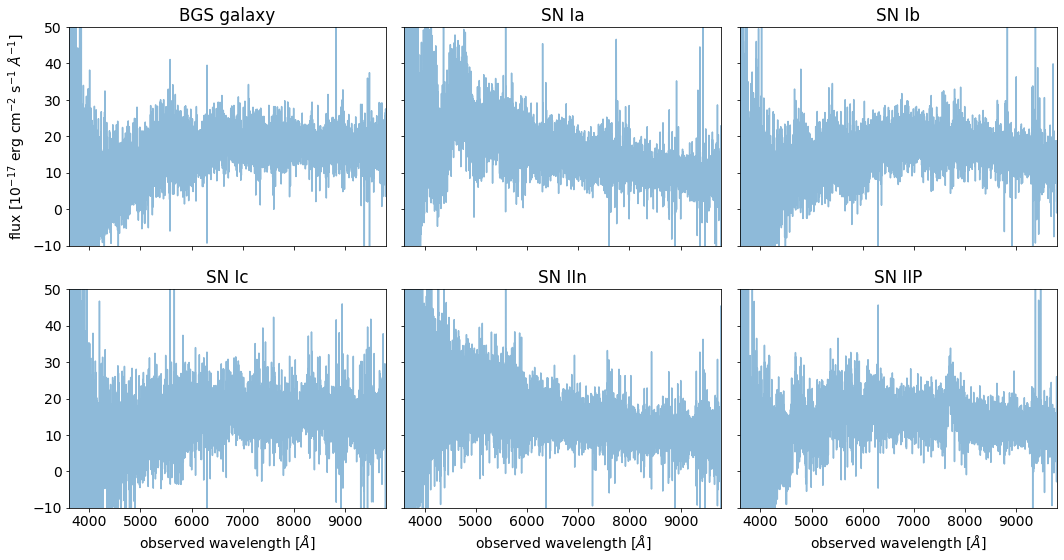

In [23]:
# Plot all the spectra on the same wavelength grid.
fig, axes = plt.subplots(2,3, figsize=(15,8), sharex=True, sharey=True, tight_layout=True)

for i, ax in enumerate(axes.flatten()):
    wave = hdus['WAVE'].data
    flux = hdus['FLUX'].data[i]
    ivar = hdus['IVAR'].data[i]
    spec = hdus['SPECTYPE'].data[i][0]
    
    ax.plot(wave, flux, alpha=0.5)
    ax.set(xlim=(3600, 9800), ylim=(-10,50),
           title=spec)

axes[0,0].set(ylabel=r'flux [$10^{-17}$ erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]');
for i in range(0,3):
    axes[1,i].set(xlabel=r'observed wavelength [$\AA$]')

#### Rebinned Spectra

Rebinning means that we take the measured intensity at several wavelengths and average them together to make one new data point at a new central wavelength. This smooths out the noisy spectra and makes the features of the supernova much easier to see.

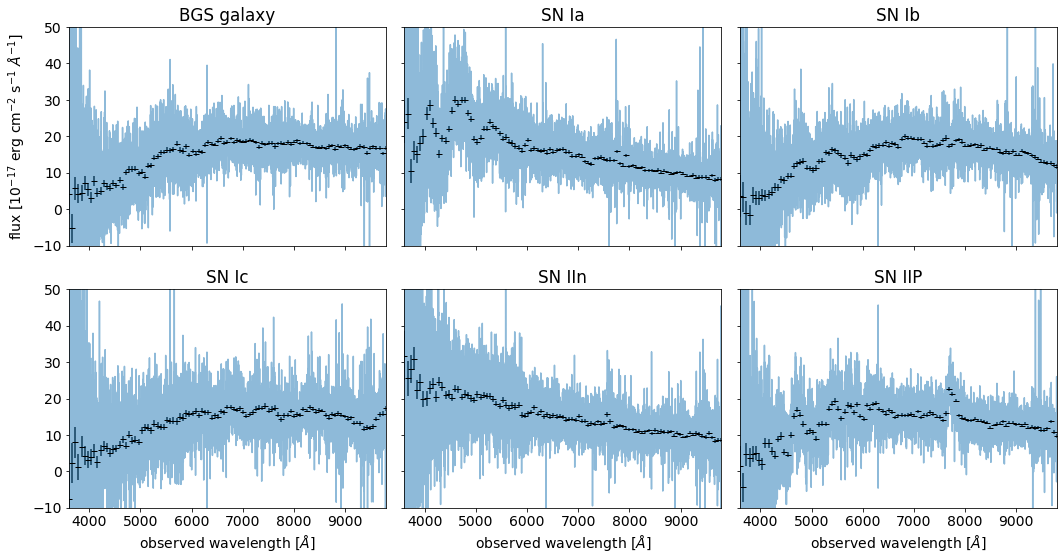

In [24]:
from desispec.interpolation import resample_flux

# Plot all the spectra on the same wavelength grid.
fig, axes = plt.subplots(2,3, figsize=(15,8), sharex=True, sharey=True, tight_layout=True)

# Resample the flux on a new wavelength grid with only 100 bins.
newwave = np.linspace(3600, 9800, 101)

for i, ax in enumerate(axes.flatten()):
    wave = hdus['WAVE'].data
    flux = hdus['FLUX'].data[i]
    ivar = hdus['IVAR'].data[i]
    spec = hdus['SPECTYPE'].data[i][0]
    
    ax.plot(wave, flux, alpha=0.5)
    
    fl, iv = resample_flux(newwave, wave, flux, ivar)
    dfl = 1./np.sqrt(iv)
    ax.errorbar(newwave, fl, yerr=dfl, fmt='k_')
    
    ax.set(xlim=(3600, 9800), ylim=(-10,50),
           title=spec)

axes[0,0].set(ylabel=r'flux [$10^{-17}$ erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]');
for i in range(0,3):
    axes[1,i].set(xlabel=r'observed wavelength [$\AA$]')